In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-fires-in-brazil/amazon.csv


In [2]:
data=pd.read_csv("/kaggle/input/forest-fires-in-brazil/amazon.csv",encoding="cp860")

# **1. Display Top 5 Rows of The Dataset**

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# **2. Check Last 5 Rows**

In [4]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# **3. Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [5]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 6454
Number of Columns: 5


# **4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


# **5. Check For Duplicate Data and Drop Them**

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
print("Number of Rows after dropping duplicate data:",data.shape[0])
print("Number of Columns after dropping duplicate data:",data.shape[1])

Number of Rows after dropping duplicate data: 6422
Number of Columns after dropping duplicate data: 5


# **6. Check Null Values In The Dataset**

In [9]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# **7. Get Overall Statistics About The Dataframe**

In [10]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN


# **8. Rename Month Names To English**

In [11]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Marτo', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [12]:
data['month']=data['month'].map({
    'Janeiro':'January',
    'Fevereiro':'February',
    'Marτo':'March',
    'Abril':'April',
    'Maio':'May',
    'Junho':'June',
    'Julho':'July',
    'Agosto':'August',
    'Setembro':'September',
    'Outubro':'October',
    'Novembro':'November',
    'Dezembro':'December'
})

In [13]:
data['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

# **9. Total Number of Fires Registered**

In [14]:
data['number'].sum()

698811.073

# **10. In Which Month Maximum Number of Forest Fires Were Reported?**

In [15]:
reg_fires_month=data.groupby('month')['number'].sum().sort_values(ascending=False)
reg_fires_month

month
July         92319.113
October      88681.579
August       88050.435
November     85508.054
September    58578.305
December     57535.480
June         55997.675
January      47681.844
May          34725.363
February     30839.050
March        30709.405
April        28184.770
Name: number, dtype: float64

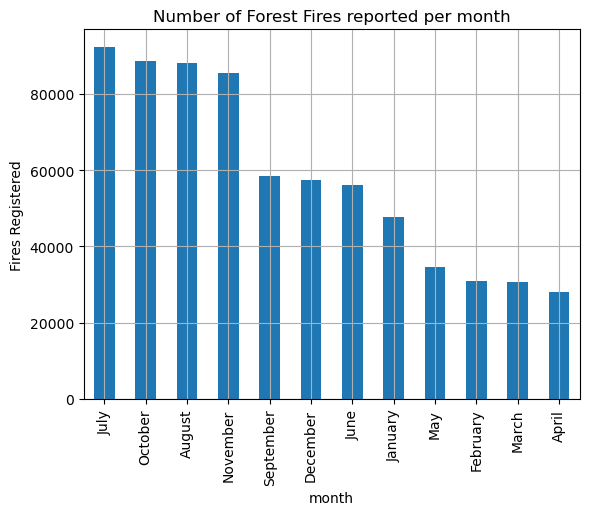

In [16]:
ax=reg_fires_month.plot(kind='bar')
plt.ylabel('Fires Registered')
plt.title('Number of Forest Fires reported per month')
plt.grid(True)
plt.show()

It is clearly visible that Maximum number of Forest Fires reported in the month of **July** i.e., of count *92319*

# **11. In Which Year Maximum Number of Forest Fires Was Reported?**

In [17]:
reg_fires_year=data.groupby('year')['number'].sum().sort_values(ascending=False)
reg_fires_year

year
2003    42760.674
2016    42212.229
2015    41208.292
2012    40084.860
2014    39621.183
2009    39116.178
2004    38450.163
2002    37390.600
2010    37037.449
2017    36619.624
2013    35137.118
2005    35004.965
2011    34633.545
2006    33824.161
2007    33028.413
2008    29378.964
2001    29054.612
2000    27351.251
1999    26882.821
1998    20013.971
Name: number, dtype: float64

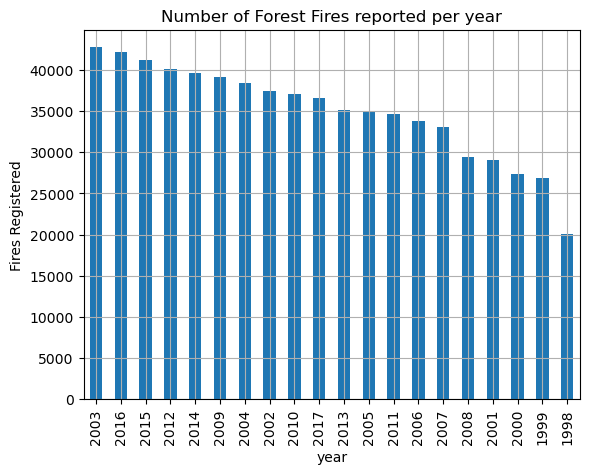

In [18]:
ax=reg_fires_year.plot(kind='bar')
plt.ylabel('Fires Registered')
plt.title('Number of Forest Fires reported per year')
plt.grid(True)
plt.show()

It is clearly visible that Maximum number of Forest Fires reported in **2003** i.e., of count *42760*

# **12. In Which State Maximum Number of Forest Fires Was Reported?**

In [19]:
reg_fires_state=data.groupby('state')['number'].sum().sort_values(ascending=False)
reg_fires_state

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Parß                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

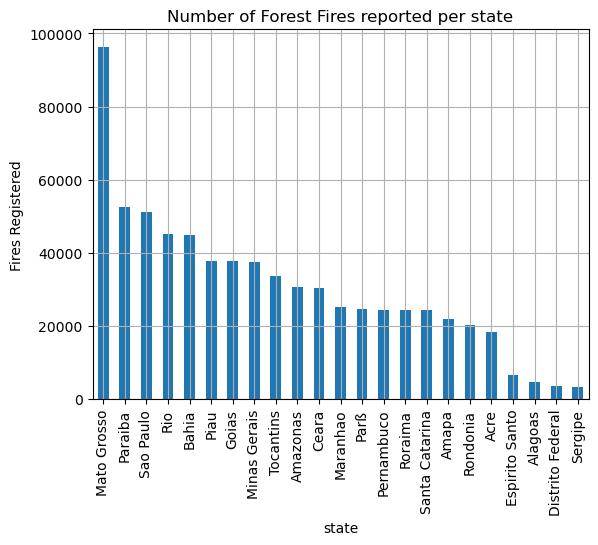

In [20]:
ax=reg_fires_state.plot(kind='bar')
plt.ylabel('Fires Registered')
plt.title('Number of Forest Fires reported per state')
plt.grid(True)
plt.show()

It is clearly visible that Maximum number of Forest Fires reported in **Mato Grosso** i.e., of count *96246*

# **13. Find Total Number of Fires Were Reported In Amazonas**

In [21]:
print("Total number of forest fires reported at Amazonas are:",reg_fires_state['Amazonas'])

Total number of forest fires reported at Amazonas are: 30650.129


# **14. Display Number of Fires Were Reported In Amazonas (Year-Wise)**

In [22]:
reg_fires_amazonas_year=data[data['state']=='Amazonas'].groupby('year')['number'].sum()
reg_fires_amazonas_year

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

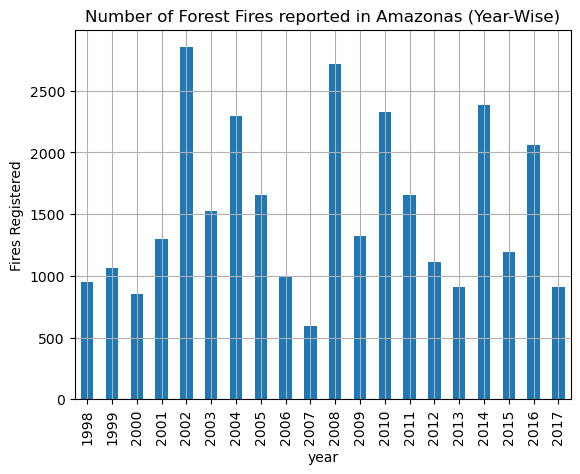

In [23]:
ax=reg_fires_amazonas_year.plot(kind='bar')
plt.ylabel('Fires Registered')
plt.title('Number of Forest Fires reported in Amazonas (Year-Wise)')
plt.grid(True)
plt.show()

# **15. Display Number of Fires Were Reported In Amazonas (Day-Wise)**

In [24]:
data['date']=data['date'].astype('datetime64[ns]')

In [25]:
data['day']=data['date'].map(lambda x:x.day_name())

In [26]:
reg_fires_amazonas_day=data[data['state']=='Amazonas'].groupby('day')['number'].sum()
reg_fires_amazonas_day

day
Friday       5446.480
Monday       1886.601
Saturday     4162.666
Sunday       3015.186
Thursday     5754.802
Tuesday      6474.217
Wednesday    3910.177
Name: number, dtype: float64

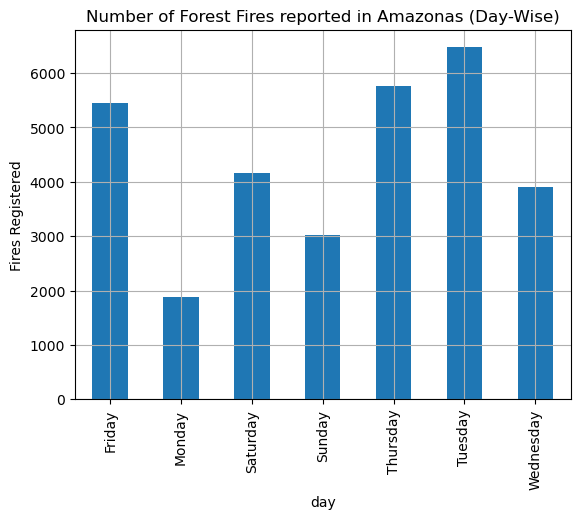

In [27]:
ax=reg_fires_amazonas_day.plot(kind='bar')
plt.ylabel('Fires Registered')
plt.title('Number of Forest Fires reported in Amazonas (Day-Wise)')
plt.grid(True)
plt.show()

# **16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’**

In [28]:
reg_fires_2015=data[data['year']==2015].groupby('month')['number'].sum()
reg_fires_2015

month
April        2573.000
August       4363.125
December     4088.522
February     2309.000
January      4635.000
July         4364.392
June         3260.552
March        2202.000
May          2384.000
November     4034.518
October      4499.525
September    2494.658
Name: number, dtype: float64

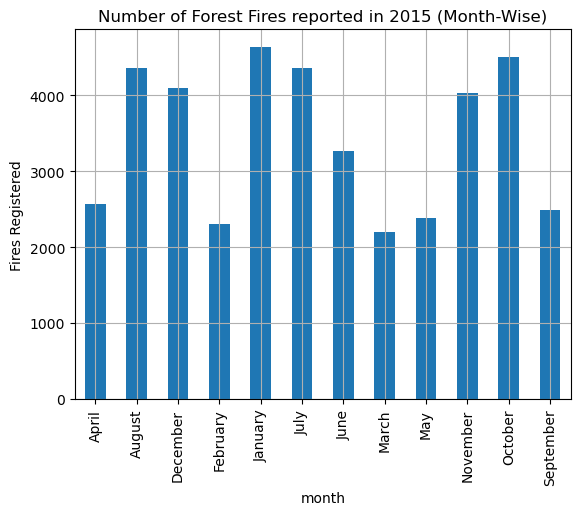

In [29]:
ax=reg_fires_2015.plot(kind='bar')
plt.ylabel('Fires Registered')
plt.title('Number of Forest Fires reported in 2015 (Month-Wise)')
plt.grid(True)
plt.show()

# **17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)**

In [30]:
reg_fires_avg_state=data.groupby('state')['number'].mean().sort_values(ascending=False)
reg_fires_avg_state

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Parß                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

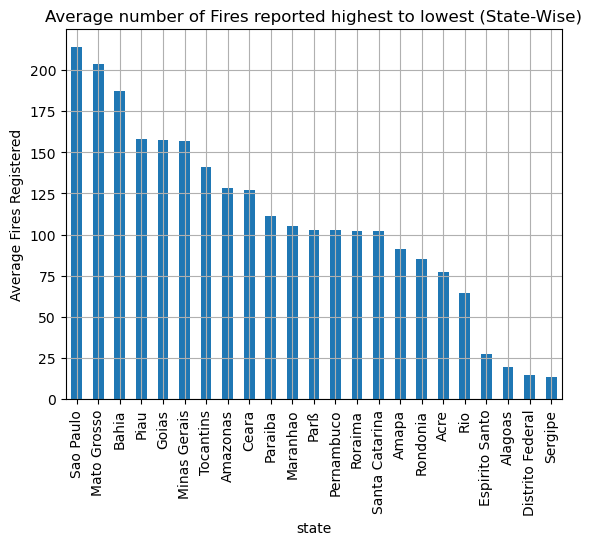

In [31]:
ax=reg_fires_avg_state.plot(kind='bar')
plt.ylabel('Average Fires Registered')
plt.title('Average number of Fires reported highest to lowest (State-Wise)')
plt.grid(True)
plt.show()

# **18.  To Find The State Names Where Fires Were Reported In 'dec' Month**

In [32]:
reg=data[data['month']=='December']['state'].value_counts()
reg

Rio                 57
Mato Grosso         38
Paraiba             38
Acre                19
Parß                19
Sergipe             19
Sao Paulo           19
Santa Catarina      19
Roraima             19
Rondonia            19
Piau                19
Pernambuco          19
Minas Gerais        19
Alagoas             19
Maranhao            19
Goias               19
Espirito Santo      19
Distrito Federal    19
Ceara               19
Bahia               19
Amazonas            19
Amapa               19
Tocantins           19
Name: state, dtype: int64

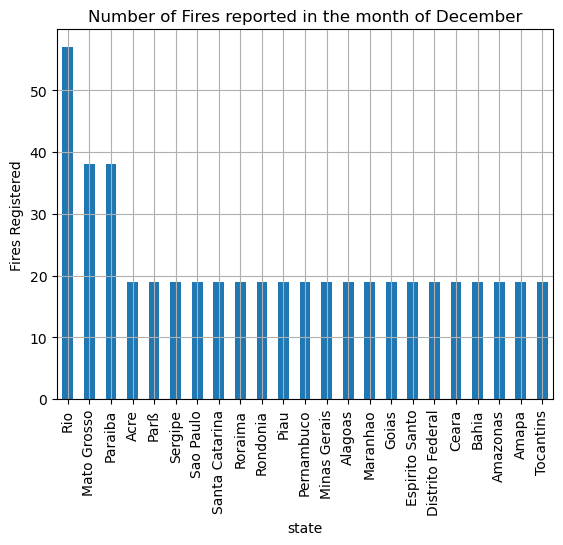

In [33]:
ax=reg.plot(kind='bar')
plt.xlabel('state')
plt.ylabel('Fires Registered')
plt.title('Number of Fires reported in the month of December')
plt.grid(True)
plt.show()